In [1]:
# 2021년 3월 BC 카드 분석본  

In [2]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("../data/BC_Card_edit.csv")
print(df.info())
df.head()
# 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB
None


,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [4]:
df['기준년월'].value_counts()

202003    135706
202103    128725
201909    109747
202009     76858
201903     68261
Name: 기준년월, dtype: int64

In [5]:
print(df[df['고객소재지_광역시도'] != '서울특별시'].shape[0])
print(df[df['고객소재지_광역시도'] == '서울특별시'].shape[0])
df = df[df['고객소재지_광역시도'] == '서울특별시']
df_1903 = df[df['기준년월'] == 202103]

213175
306122


In [6]:
df_1903.head(10)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
390089,202103,11,패션잡화,1111,신발,여성,50대,성인자녀가구,서울특별시,구로구,궁동,318490,7
390090,202103,11,패션잡화,1110,양말,여성,50대,성인자녀가구,서울특별시,강동구,길동,1469083,19
390091,202103,20,여가/스포츠,2013,여행,남성,30대,1인가구,서울특별시,강동구,길동,1042413,30
390092,202103,20,여가/스포츠,2010,스포츠,남성,40대,초중고자녀가구,서울특별시,강동구,길동,140273,5
390093,202103,17,생활,1710,생활용품,여성,60대 이상,노인가구,서울특별시,강동구,길동,428515,21
390094,202103,11,패션잡화,1110,양말,여성,30대,신혼영유아가구,서울특별시,광진구,능동,45597,5
390095,202103,15,전자,1511,디지털,남성,30대,신혼영유아가구,서울특별시,광진구,능동,1193531,14
390099,202103,11,패션잡화,1112,가방,남성,40대,초중고자녀가구,서울특별시,양천구,목동,1242008,10
390100,202103,15,전자,1510,가전,여성,20대,1인가구,서울특별시,양천구,목동,3300270,31
390101,202103,13,가구,1314,기타,여성,30대,1인가구,서울특별시,양천구,목동,244110,5


In [7]:
import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist])) 
mpl.rc('font', family='NanumBarunGothic') 

여성    47818
남성    27695
Name: 성별, dtype: int64


<AxesSubplot:>

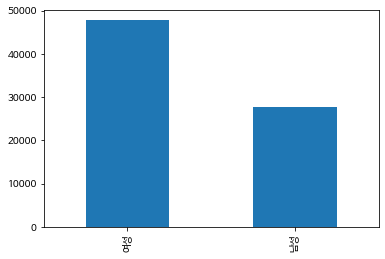

In [8]:
print(df_1903['성별'].value_counts())
df_1903['성별'].value_counts().plot.bar()

6 개
['20대', '20세 미만', '30대', '50대', '60대 이상', '40대']
40대       22789
30대       21781
20대       12843
50대       11985
60대 이상     5242
20세 미만      873
Name: 연령, dtype: int64


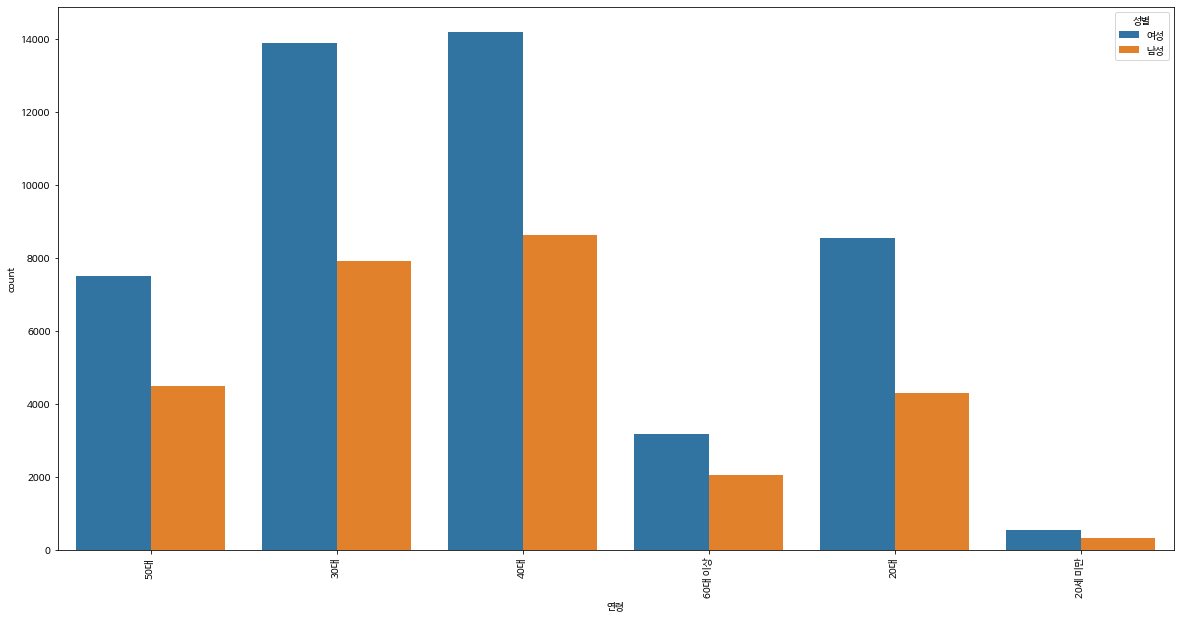

여성 연령 분포 및 순위
40대       14166
30대       13880
20대        8538
50대        7503
60대 이상     3182
20세 미만      549
Name: 연령, dtype: int64
40대       1.0
30대       2.0
20대       3.0
50대       4.0
60대 이상    5.0
20세 미만    6.0
Name: 연령, dtype: float64
남성 연령 분포 및 순위
40대       8623
30대       7901
50대       4482
20대       4305
60대 이상    2060
20세 미만     324
Name: 연령, dtype: int64
40대       1.0
30대       2.0
50대       3.0
20대       4.0
60대 이상    5.0
20세 미만    6.0
Name: 연령, dtype: float64


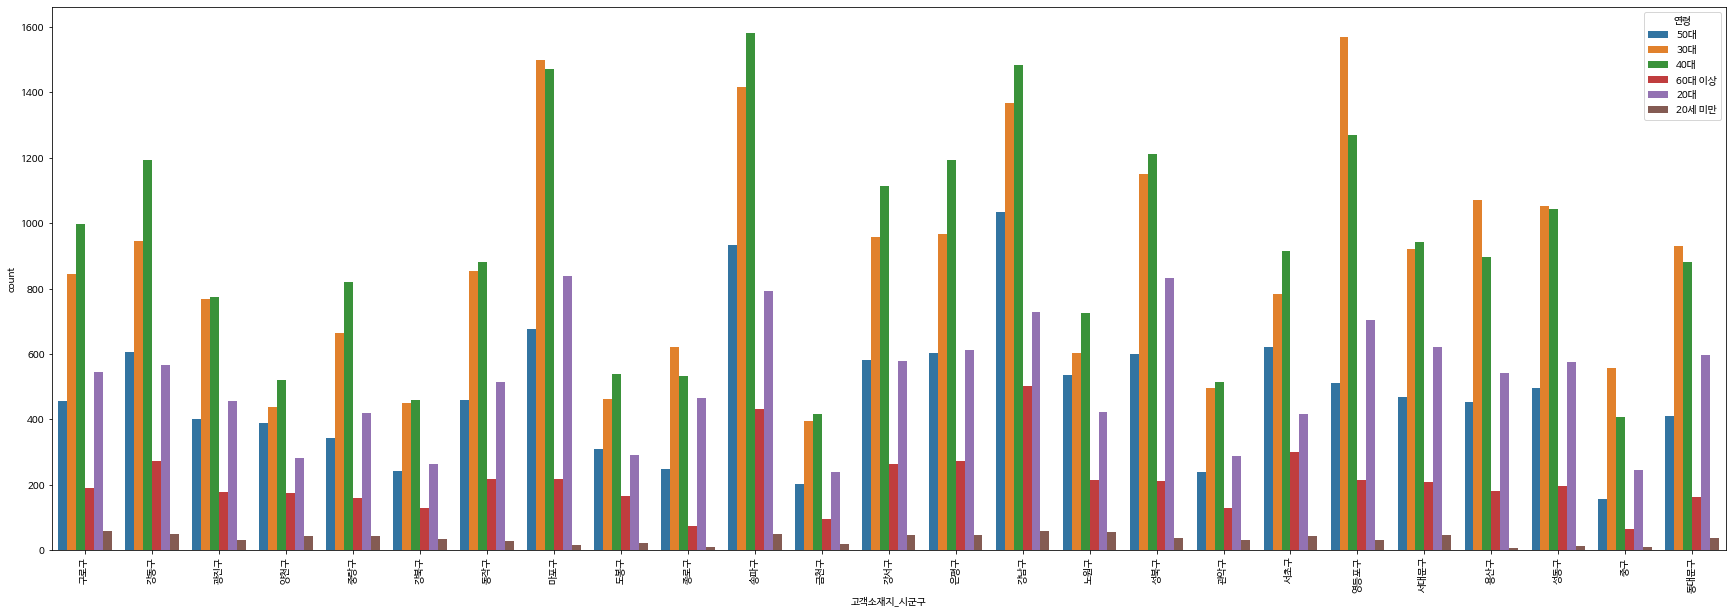

In [9]:
age = list(set(df_1903['연령']))
print(len(age),'개')
print(age)

# 총 연령 분포
print(df_1903['연령'].value_counts())

plt.figure(figsize=(20,10))
sns.countplot(x='연령', hue = '성별', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

df_1903_female =df_1903[df_1903['성별'] == '여성']
print('여성 연령 분포 및 순위')
print(df_1903_female['연령'].value_counts())
print(df_1903_female['연령'].value_counts().rank(ascending = False))

df_1903_male =df_1903[df_1903['성별'] == '남성']
print('남성 연령 분포 및 순위')
print(df_1903_male['연령'].value_counts())
print(df_1903_male['연령'].value_counts().rank(ascending = False))


plt.figure(figsize=(30,10))
sns.countplot(x='고객소재지_시군구', hue = '연령', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

25 개
['서대문구', '은평구', '종로구', '성동구', '강남구', '강서구', '강북구', '송파구', '동대문구', '구로구', '성북구', '중구', '금천구', '양천구', '광진구', '용산구', '관악구', '중랑구', '도봉구', '노원구', '마포구', '강동구', '동작구', '영등포구', '서초구']


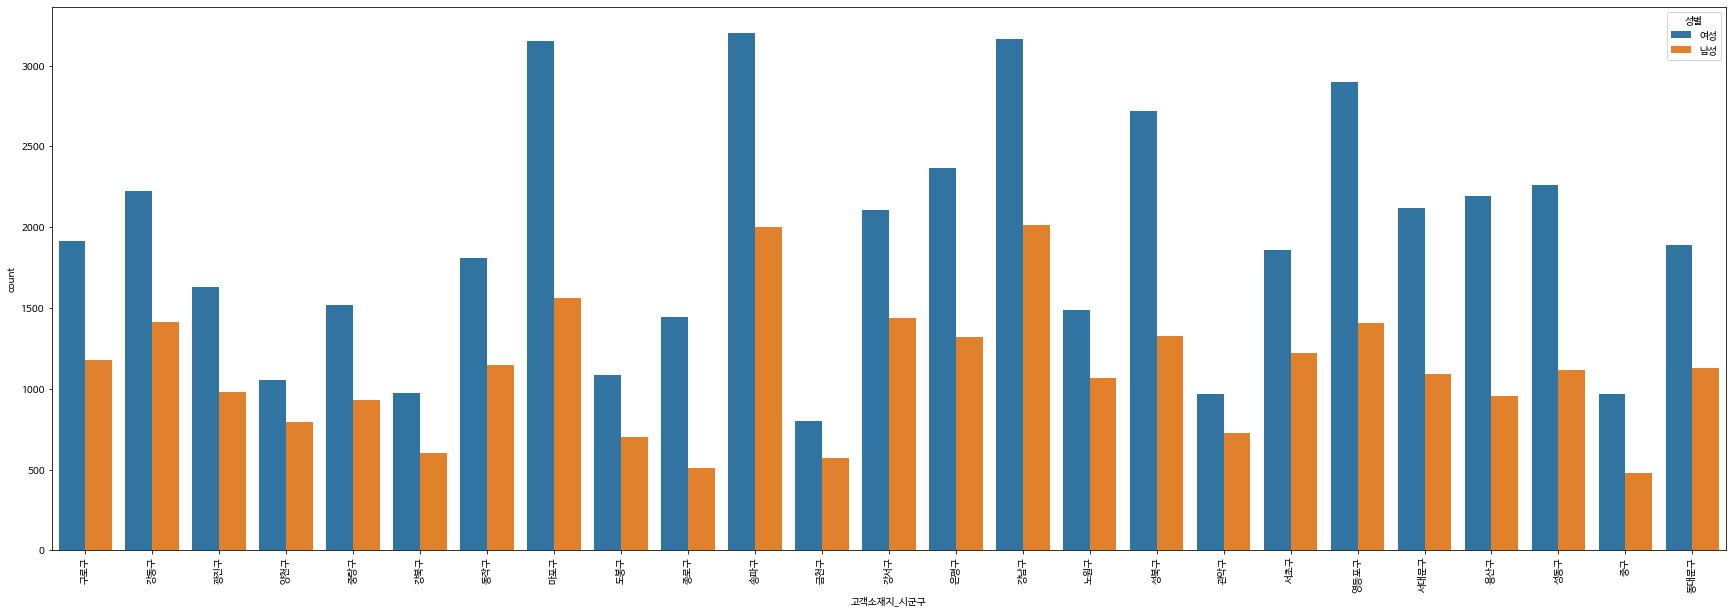

송파구     1.0
강남구     2.0
마포구     3.0
영등포구    4.0
성북구     5.0
Name: 고객소재지_시군구, dtype: float64
강남구    1.0
송파구    2.0
마포구    3.0
강서구    4.0
강동구    5.0
Name: 고객소재지_시군구, dtype: float64


In [10]:
sigoongu = list(set(df_1903['고객소재지_시군구']))
print(len(sigoongu),'개')
print(sigoongu)

###################################### 필요한지에 대해서 의문
# print(df_1903['고객소재지_시군구'].value_counts()) 
# 이게 의미하는 바가 여성 의류 13건(==> 여성 의류별 1건) +  남성 의류 2건(==> 남성 의류별 1건) +  ,,,
# 이렇게 진행되는데 그냥 시군구별row를 개수 세서 저장하는건데 필요한지는 의문
# 아니면 내가 이걸 잘못 이해하고 있는 것일 수도 있음

plt.figure(figsize=(30,10))
sns.countplot(x='고객소재지_시군구', hue = '성별', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

print(df_1903_female['고객소재지_시군구'].value_counts().rank(ascending = False).head(5))
print(df_1903_male['고객소재지_시군구'].value_counts().rank(ascending = False).head(5))

5 개
['1인가구', '노인가구', '성인자녀가구', '신혼영유아가구', '초중고자녀가구']
신혼영유아가구    24772
1인가구       19257
초중고자녀가구    14991
성인자녀가구     11251
노인가구        5242
Name: 가구생애주기, dtype: int64


<AxesSubplot:>

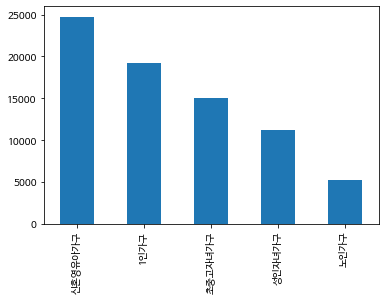

In [11]:
family = list(set(df_1903['가구생애주기']))
print(len(family),'개')
print(family)

print(df_1903['가구생애주기'].value_counts())
df_1903['가구생애주기'].value_counts().plot.bar()

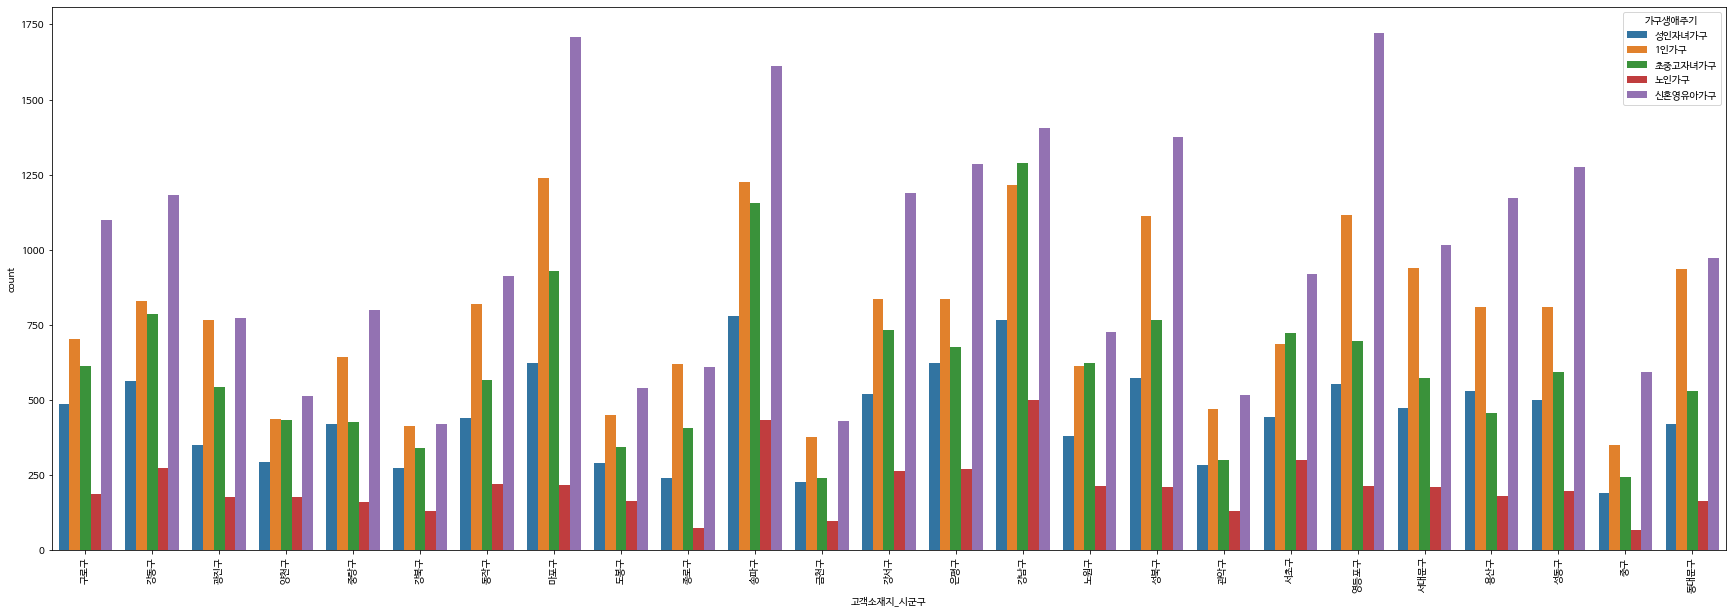

In [12]:
plt.figure(figsize=(30,10))
sns.countplot(x='고객소재지_시군구', hue = '가구생애주기', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

# 이렇게 한번에 보는 것도 방법이지만 따로 시군구 별로 plot해서 만드는거 계획 예정
# 추가로 명수라고 해야 되나 그 건수?도 추가 예정
# ex) 군포시 1인가구 : 123, 노인가구 : 123


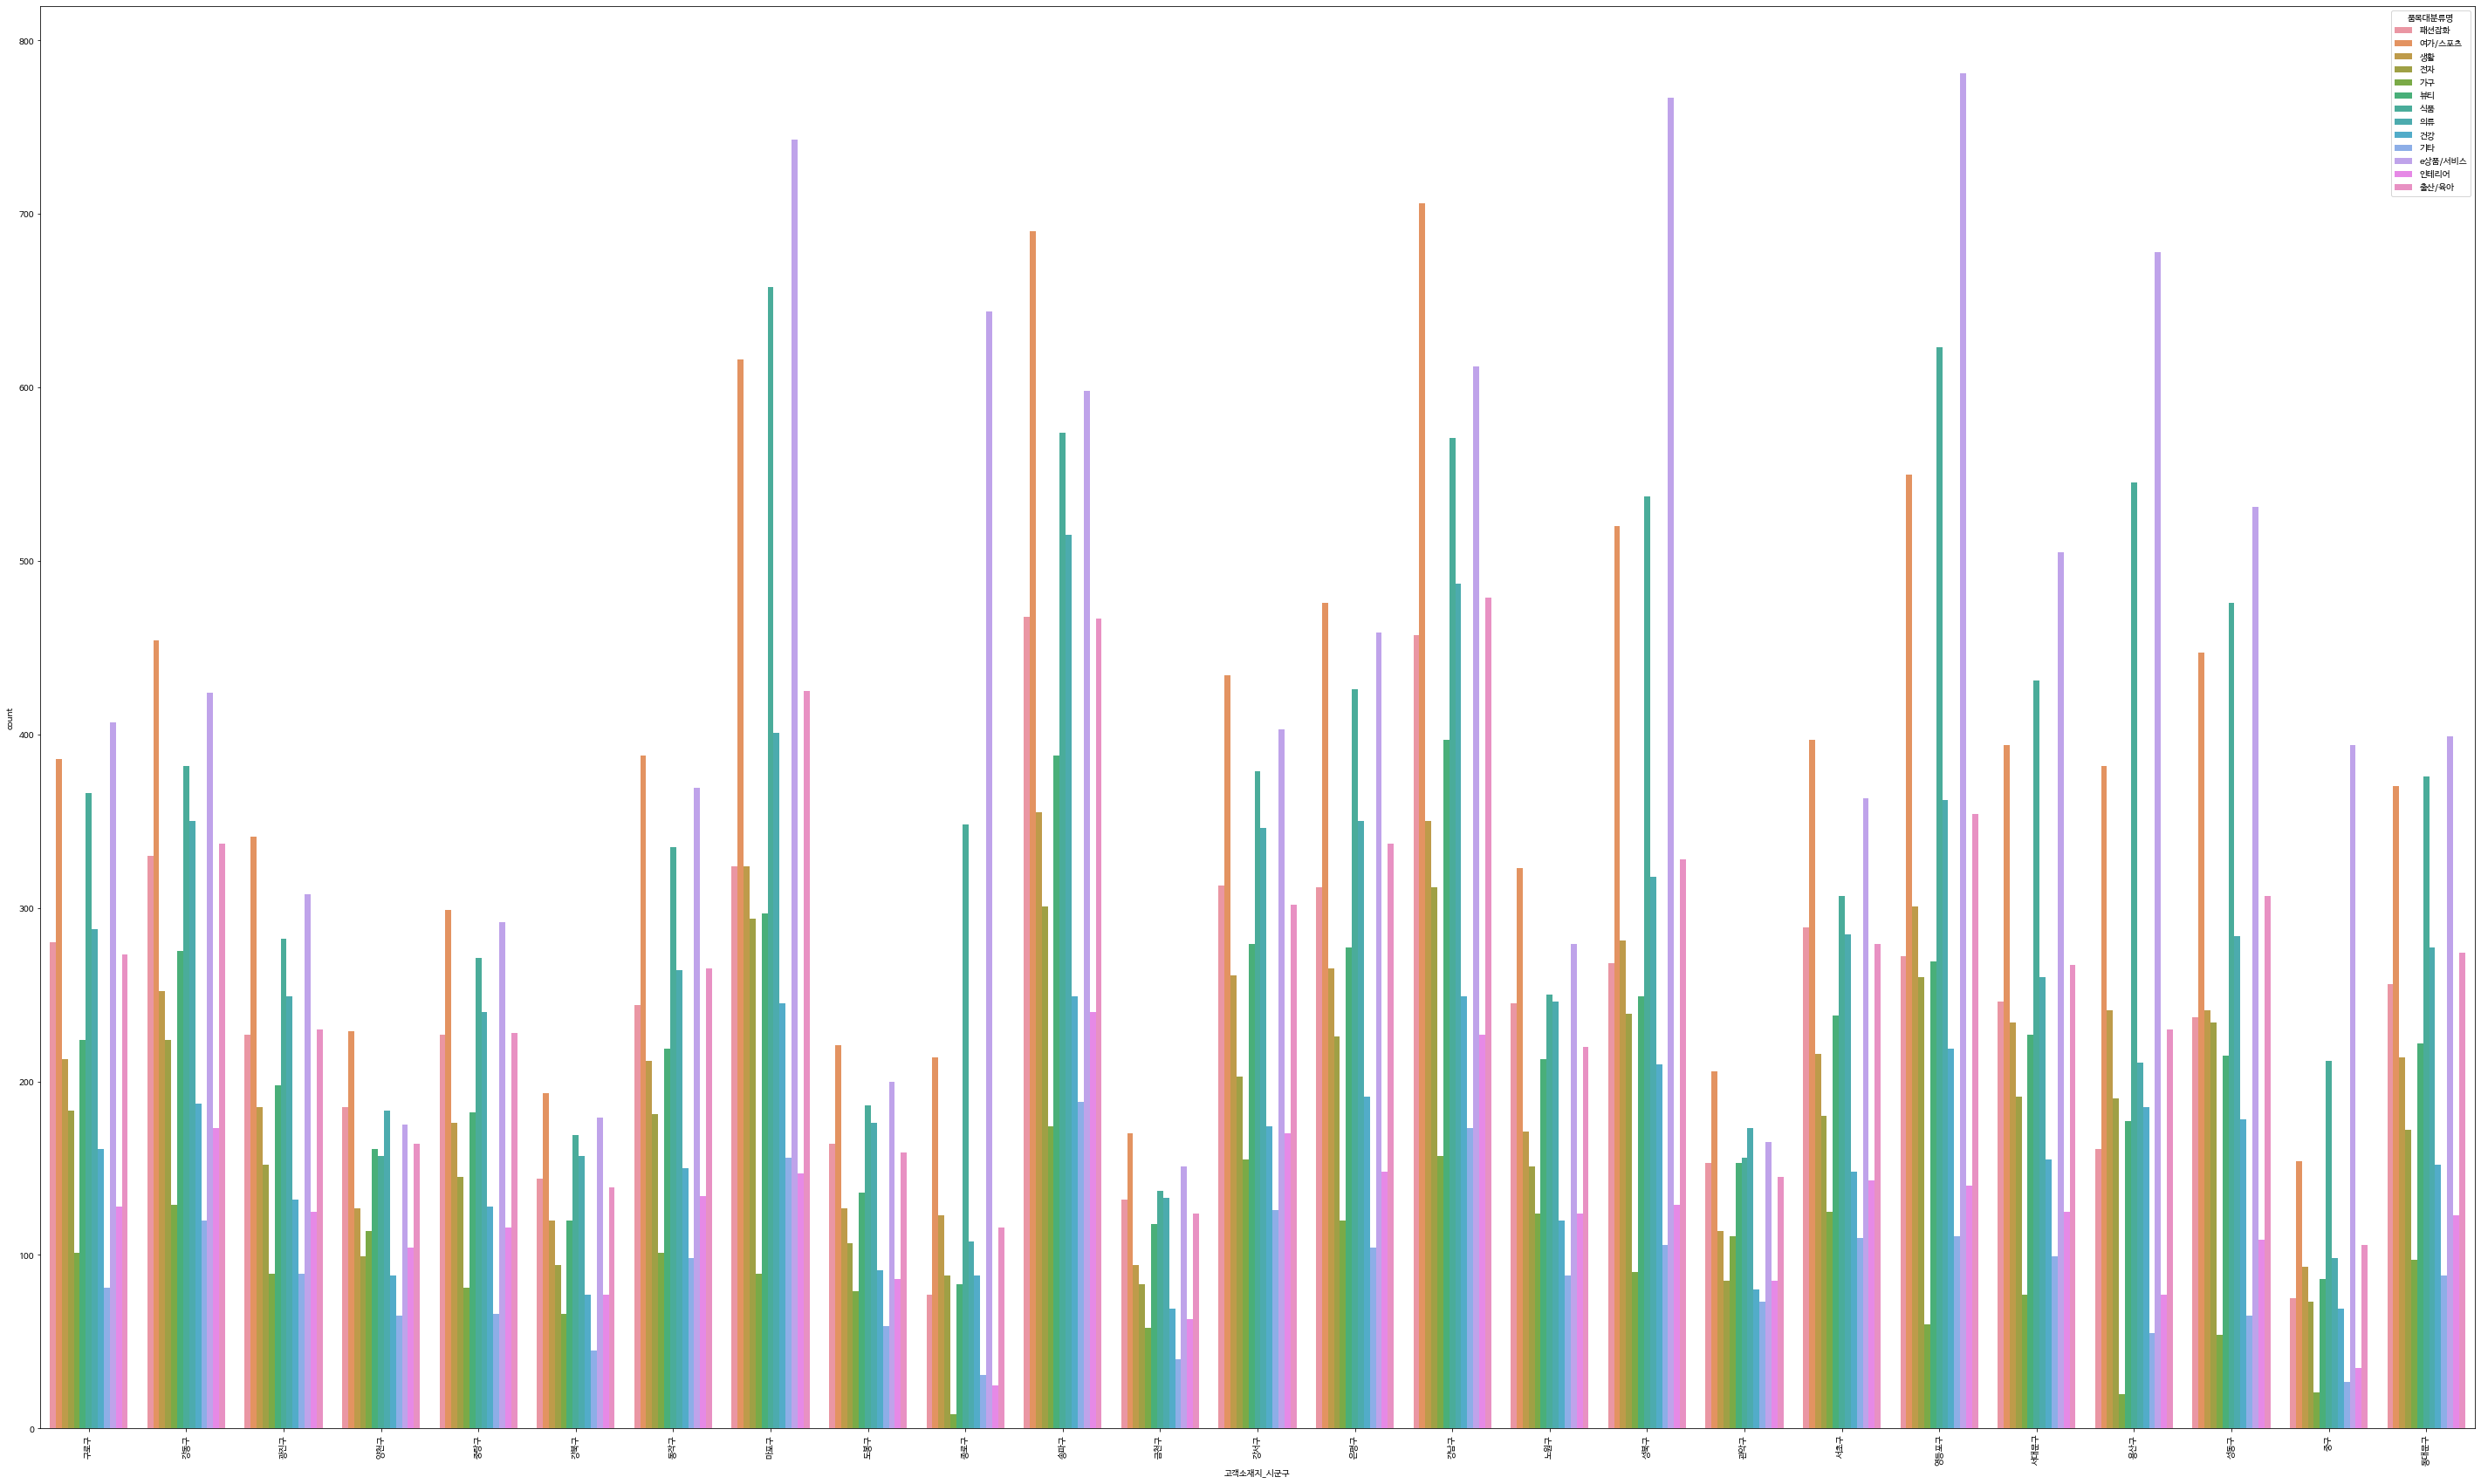

In [13]:
plt.figure(figsize=(50,30))
sns.countplot(x='고객소재지_시군구', hue = '품목대분류명', data = df_1903)
plt.xticks(rotation = 90)
plt.show()

# 여기 부분도 변경 예정
# 각 시군구 별로 매출금액 - 대품목별, 중품목별 매출건수 - 대품목별, 중폼목별
# 총 4개의 그래프 추가 예정

고객소재지_시군구
강남구     13797383432
강동구      7926951668
강북구      4434777963
강서구     10440382956
관악구      9238102111
광진구      6191994347
구로구      6638837119
금천구      3556677579
노원구      8189503376
도봉구      4463152431
동대문구     5769808089
동작구      7100686492
마포구      7650122159
서대문구     5944466323
서초구      9576893559
성동구      5344772853
성북구      6546880378
송파구     12877988324
양천구      7767070713
영등포구     6734446910
용산구      3970938108
은평구      7421129799
종로구      1968409043
중구       2179035356
중랑구      5456346946
Name: 매출금액, dtype: int64


<AxesSubplot:xlabel='고객소재지_시군구'>

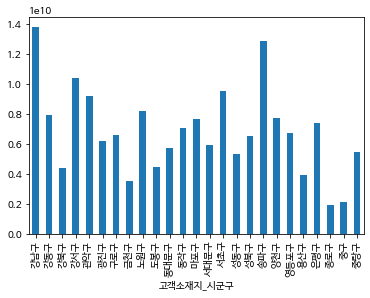

In [14]:
df_1903_매출금액합 = df_1903.groupby('고객소재지_시군구')['매출금액'].sum()
print(df_1903_매출금액합)
df_1903_매출금액합.plot.bar()

고객소재지_시군구
강남구     250832
강동구     182282
강북구     105477
강서구     242974
관악구     227516
광진구     146449
구로구     161278
금천구      90765
노원구     194060
도봉구     106378
동대문구    138077
동작구     160299
마포구     167358
서대문구    135067
서초구     172763
성동구     109050
성북구     153223
송파구     266282
양천구     170749
영등포구    150529
용산구      79909
은평구     175200
종로구      45835
중구       47996
중랑구     139580
Name: 매출건수, dtype: int64


<AxesSubplot:xlabel='고객소재지_시군구'>

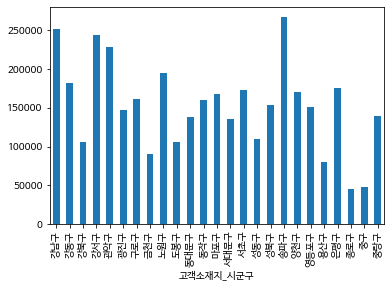

In [15]:
df_1903_매출건수합 = df_1903.groupby('고객소재지_시군구')['매출건수'].sum()
print(df_1903_매출건수합)
df_1903_매출건수합.plot.bar()